In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/home/rsunketa/HML/datasets/botnet_10_features.csv')

print(df.head())
print(df.shape)

   seq    stddev  N_IN_Conn_P_SrcIP       min  state_number      mean  \
0    9  0.068909                 75  0.000000             1  0.068909   
1   10  0.000000                  2  0.000131             2  0.000131   
2   11  0.064494                 75  0.000000             1  0.064494   
3   12  0.064189                 75  0.000000             1  0.064189   
4   13  0.063887                 75  0.000000             1  0.063887   

   N_IN_Conn_P_DstIP      drate     srate       max  attack category  \
0                 96  14.511893  0.566862  0.137818       1      DoS   
1                  1   0.000000  0.000000  0.000131       1      DoS   
2                 96  15.505319  0.567549  0.128988       1      DoS   
3                 96  15.578993  0.567570  0.128378       1      DoS   
4                 96  15.652637  0.567630  0.127774       1      DoS   

  subcategory  
0        HTTP  
1        HTTP  
2        HTTP  
3        HTTP  
4        HTTP  
(3668522, 13)


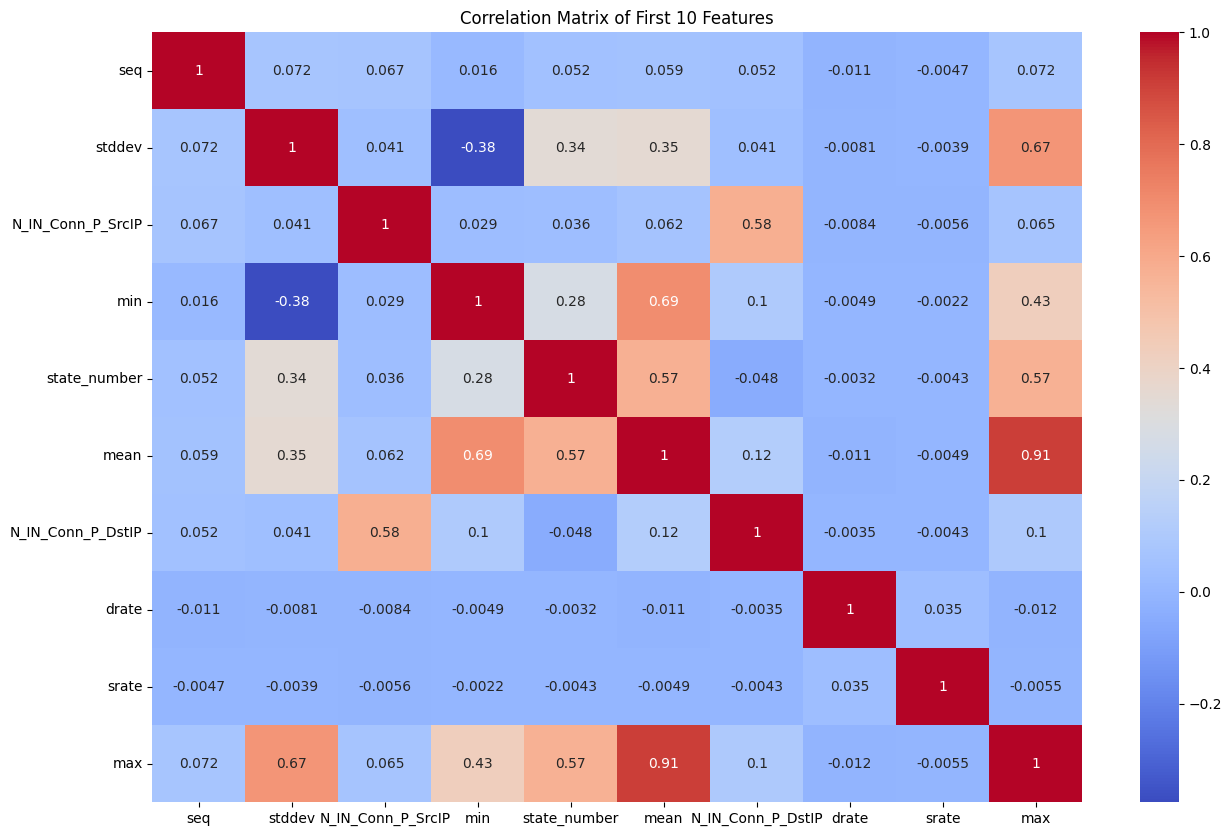

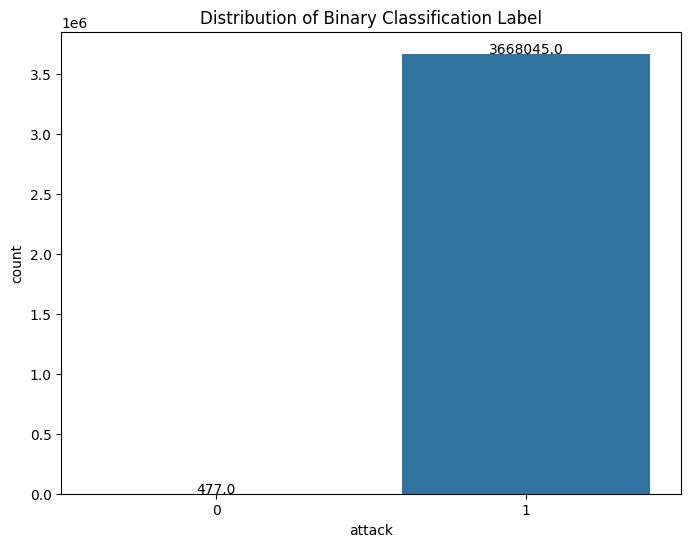

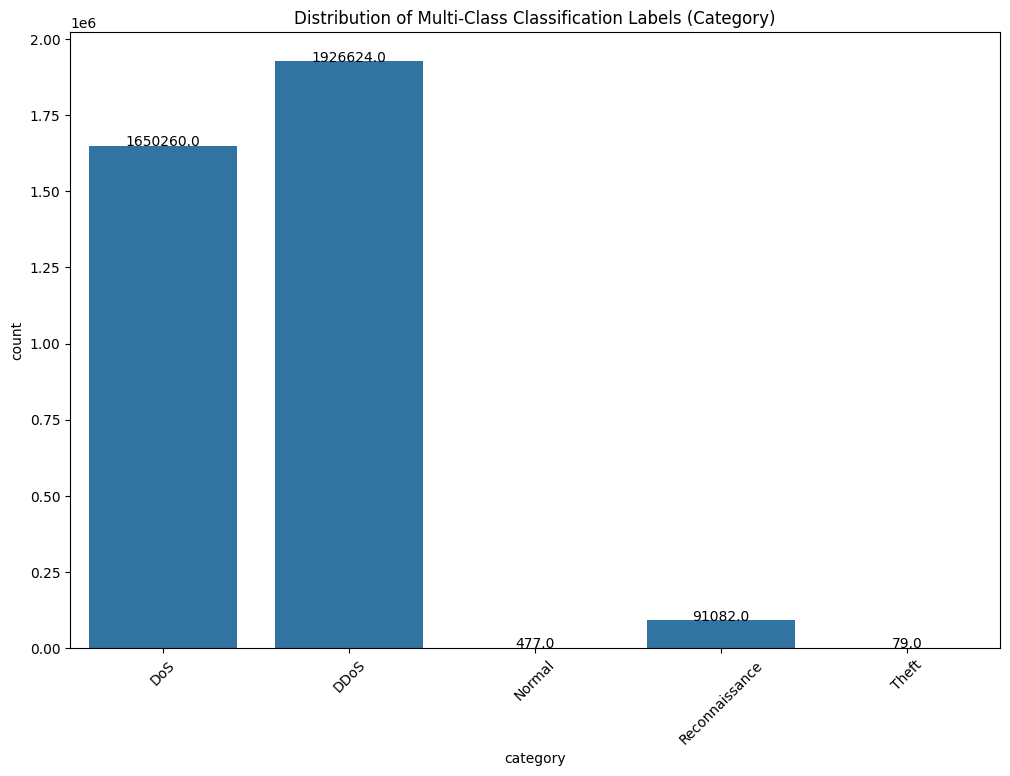

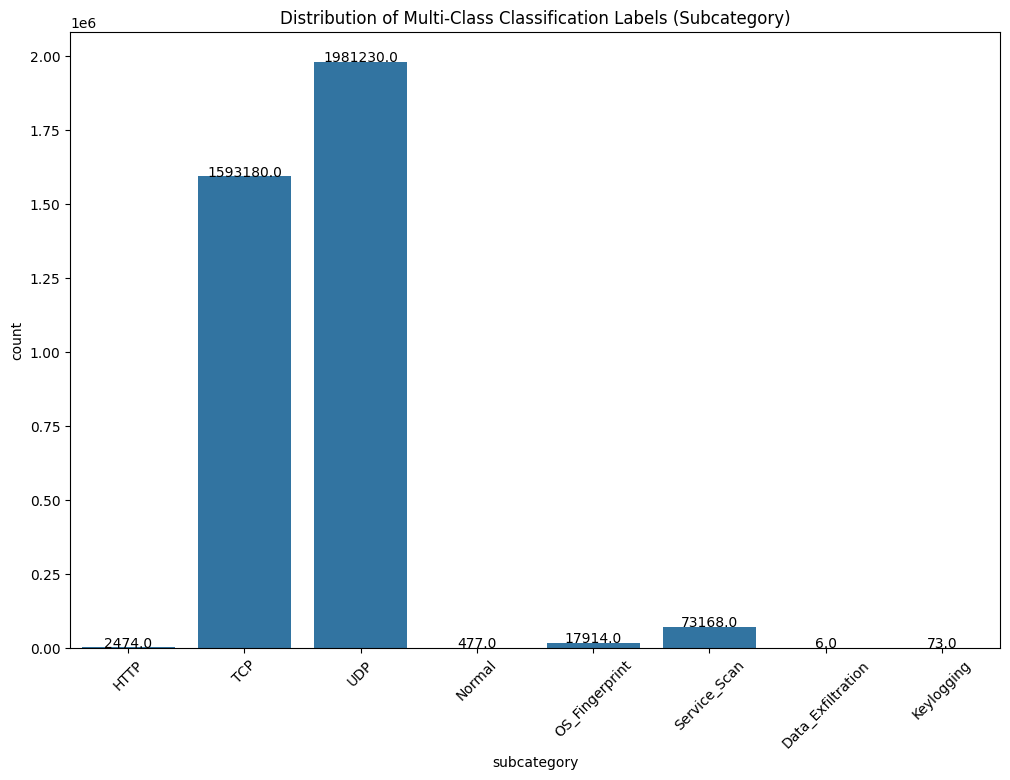

In [ ]:

# Split the columns into features and labels
features = df.iloc[:, :10]
binary_label = df.iloc[:, 10]
category_label = df.iloc[:, 11]
subcategory_label = df.iloc[:, 12]

#  features
plt.figure(figsize=(15, 10))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of First 10 Features')
plt.show()

# distribution of  binary classification label
plt.figure(figsize=(8, 6))
sns.countplot(x=binary_label)
plt.title('Distribution of Binary Classification Label')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

# distribution of Category
plt.figure(figsize=(12, 8))
sns.countplot(x=category_label)
plt.title('Distribution of Multi-Class Classification Labels (Category)')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

# distribution of Subcategory
plt.figure(figsize=(12, 8))
sns.countplot(x=subcategory_label)
plt.title('Distribution of Multi-Class Classification Labels (Subcategory)')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [ ]:

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
features_resampled, binary_label_resampled = smote.fit_resample(features, binary_label)

print(f'Original dataset shape: {binary_label.value_counts()}')
print(f'Resampled dataset shape: {binary_label_resampled.value_counts()}')


Original dataset shape: attack
1    3668045
0        477
Name: count, dtype: int64
Resampled dataset shape: attack
1    3668045
0    3668045
Name: count, dtype: int64


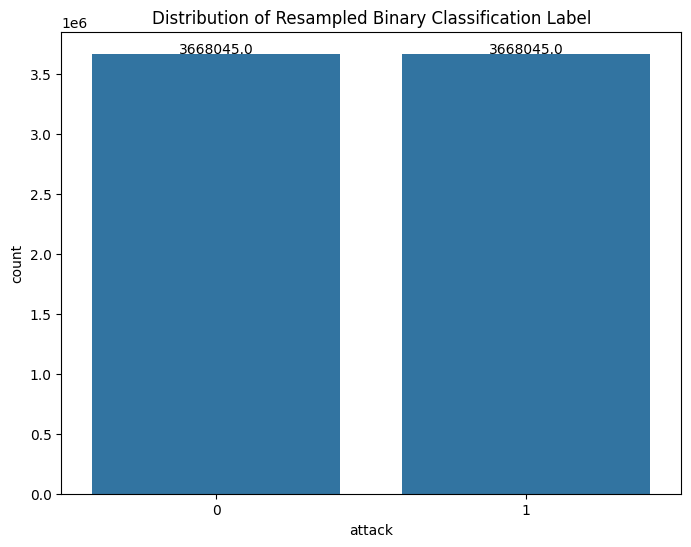

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=binary_label_resampled)
plt.title('Distribution of Resampled Binary Classification Label')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize 
scaler = StandardScaler()
features_resampled_normalized = scaler.fit_transform(features_resampled)

features_resampled_normalized = pd.DataFrame(features_resampled_normalized, columns=features.columns)

# scale
min_max_scaler = MinMaxScaler()
features_resampled_scaled = min_max_scaler.fit_transform(features_resampled_normalized)

features_resampled_scaled = pd.DataFrame(features_resampled_scaled, columns=features.columns)

print(features_resampled_scaled.describe().loc[['min', 'max', 'mean']])

          seq    stddev  N_IN_Conn_P_SrcIP       min  state_number      mean  \
min   0.00000  0.000000           0.000000  0.000000      0.000000  0.000000   
max   1.00000  1.000000           1.000000  1.000000      1.000000  1.000000   
mean  0.24823  0.185771           0.509279  0.135279      0.192783  0.275314   

      N_IN_Conn_P_DstIP     drate     srate      max  
min            0.000000  0.000000  0.000000  0.00000  
max            1.000000  1.000000  1.000000  1.00000  
mean           0.497228  0.000081  0.002395  0.35727  


In [ ]:
features_resampled_scaled.to_csv('/home/rsunketa/HML/datasets/botnet_10_best_features/botnet_resampled_scaled_features.csv', index=False)

binary_label_resampled.to_csv('/home/rsunketa/HML/datasets/botnet_10_best_features/botnet_resampled_binary_label.csv', index=False)

# category_label.to_csv('/home/rsunketa/HML/datasets/botnet_10_best_features/botnet_category_label.csv', index=False)

# subcategory_label.to_csv('/home/rsunketa/HML/datasets/botnet_10_best_features/botnet_subcategory_label.csv', index=False)